▲리스트7.1：sin함수에 노이즈를 더한 데이터

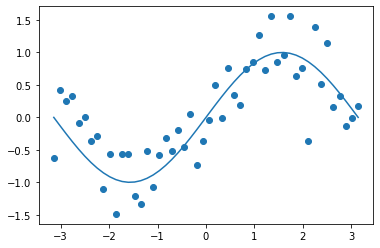

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi)  # 입력
T = np.sin(X)  # 데이터
plt.plot(X, T)  # 노이즈의 추가 전

T += 0.4*np.random.randn(len(X))  # 정규분포를 따른 노이즈를 추가
plt.scatter(X, T)  # 노이즈 추가 후

plt.show()

X /= np.pi  # 수렴하기 쉽게 X의 범위를 -1부터 1 사이로 수렴한다

▲리스트7.2：최급강하법에 의한 다항식 회귀

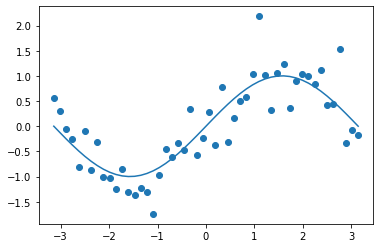

--- 1차다항식 ---


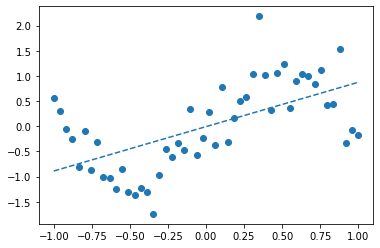

--- 3차다항식 ---


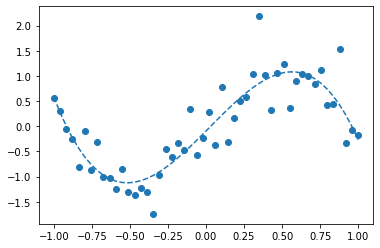

--- 6차다항식 ---


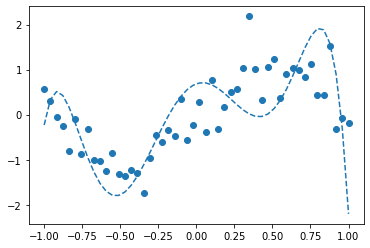

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi)  # 입력
T = np.sin(X)  # 데이터
plt.plot(X, T)  # 노이즈의 추가 전

T += 0.4*np.random.randn(len(X))  # 정규분포를 따른 노이즈를 추가
plt.scatter(X, T)  # 노이즈 추가 후

plt.show()

X /= np.pi  # 수렴하기 쉽게 X의 범위를 -1부터 1 사이로 수렴한다

eta = 0.01  # 학습계수


# --- 다항식 ---
def polynomial(x, params):
    poly = 0
    for i in range(len(params)):
        poly += params[i]*x**i  #  (식1)
    return poly

# --- 각 파라미터의 기울기 ---
def grad_params(X, T, params):
    grad_ps = np.zeros(len(params))
    for i in range(len(params)):    
        for j in range(len(X)):
            grad_ps[i] += ( polynomial(X[j], params) - T[j] )*X[j]**i  # (식7)
    return grad_ps

# --- 학습 ---
def fit(X, T, degree, epoch):  # degree: 다항식의 차수 epoch: 반복하는 횟수
    
    # --- 파라미터의 초깃값을 설정 ---
    params = np.random.randn(degree+1)  # 파라미터의 초깃값
    for i in range(len(params)):
        params[i] *= 2**i  # 고차의 항일수록 파라미터의 초깃값을 크게 한다
        
    # --- 파라미터의 갱신 ---
    for i in range(epoch): 
        params -= eta * grad_params(X, T, params)  # (식4)
        
    return params

# --- 결과 표시 --- 
degrees = [1, 3, 6]  # 다항식의 차수
for degree in degrees:
    print("--- " + str(degree) + "차다항식 ---")  # str로 문자열로 변환
    params = fit(X, T, degree, 1000)
    Y = polynomial(X, params)  # 학습 후의 파라미터를 사용한 다항식
    plt.scatter(X, T)
    plt.plot(X, Y, linestyle="dashed")
    plt.show()

#### □문제
　위에 적은 다항식 회귀의 코드에서 다항식의 차수를 변경해서 실행해 봅시다.

#### □정답 예
　스스로 상정한 결과로 됐는지를 확인해 봅시다.